<br><br><br><br>
<h4><b>Data Analysis - Products_ActBalance Dataset</b></h4>
<br><br>

<pre>  
<b>1. Environment setup-used</b>
<br>
<b>2. Notebook Flow</b>
      2.1 File Read
      2.2 Pre-processing of Products_ActBalance dataset  
           a. Basic understanding of the data 
                - Sample data display
                - No of observations 
                - Datatype of the features
           b. Inspecing missing values/nan, if there is any
           c. Removal (or) replacing missing values/nan if necessary 
           d. Visual inspection of data
           e. Drescriptive statistics
<br>
<b>3. Assumptions & Takeaway</b>
<br>
</pre>

In [1]:
import numpy as np
import pandas as pd
import os

#----- Plotting & Visualization
import matplotlib.pyplot as plt
import seaborn as sb
bold_s = '\033[1m' #----- To print bold font
bold_e = '\033[0m'

#----- Pre-Processing
from utils import Preprocess, file_read

#----- Stats
from scipy.stats import norm

<br><br><br>
<h4><b>2.1 File Read</b></h4>
<pre>
File reading of Doc_sem dataset
</pre>

In [2]:
Products_ActBalance = file_read('Products_ActBalance')

<br><br><br>
<h4><b>2.2 Pre-processing of 'Products_ActBalance' dataset  </b></h4>
<pre>
    a. Basic understanding of the data 
        - Sample data display
        - No of observations 
        - Datatype of the features
    b. Inspecing missing values/nan, if there is any
    c. Removal (or) replacing missing values/nan if necessary 
    d. Visual inspection of data
    e. Drescriptive statistics
</pre>

In [3]:
preprocess = Preprocess()

In [4]:
#----- a. Basic understanding of the data
preprocess.display_data(Products_ActBalance,'Products_ActBalance')




#----- Displaying top 5 rows of data-group:Products_ActBalance


,Client,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,1,1,NaN,NaN,1.0,NaN,NaN,1333.802857,NaN,NaN,0.0,NaN,NaN
1,2,1,1.0,NaN,NaN,NaN,NaN,110.768571,13326.190357,NaN,NaN,NaN,NaN
2,3,1,NaN,1.0,NaN,NaN,NaN,482.654643,NaN,107.251786,NaN,NaN,NaN
3,4,1,1.0,NaN,NaN,1.0,NaN,1599.840714,76.437143,NaN,NaN,1110.381786,NaN
4,5,1,1.0,NaN,NaN,NaN,NaN,5353.483929,8079.715714,NaN,NaN,NaN,NaN



#----- No.of observations
1615

#----- features' datatypes and other info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Client      1615 non-null   int64  
 1   Count_CA    1615 non-null   int64  
 2   Count_SA    426 non-null    float64
 3   Count_MF    306 non-null    float64
 4   Count_OVD   419 non-null    float64
 5   Count_CC    170 non-null    float64
 6   Count_CL    135 non-null    float64
 7   ActBal_CA   1615 non-null   float64
 8   ActBal_SA   426 non-null    float64
 9   ActBal_MF   306 non-null    float64
 10  ActBal_OVD  419 non-null    float64
 11  ActBal_CC   170 non-null    float64
 12  ActBal_CL   135 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 164.1 KB

None


In [5]:
#----- b. Inspecting missing values
preprocess.inspect_missing_values(Products_ActBalance)




#----- Inspecting missing values
Client           0
Count_CA         0
Count_SA      1189
Count_MF      1309
Count_OVD     1196
Count_CC      1445
Count_CL      1480
ActBal_CA        0
ActBal_SA     1189
ActBal_MF     1309
ActBal_OVD    1196
ActBal_CC     1445
ActBal_CL     1480
dtype: int64


<br>
<pre>
<b>Based on the review, when the Count_account features are not filled, their corresponding ActBal values are also missing. This suggests that if a client account does not exist or hasn’t been opened, the associated account balance is likewise unavailable.</b>

Observed evidence,

Count_SA = NaN , ActBal_SA = NaN
Count_MF = NaN , ActBal_MF = NaN 
Count_OVD = NaN , ActBal_OVD = NaN
Count_CC = NaN , ActBal_CC = NaN     
Count_CL = NaN , ActBal_CL = NaN   

</pre>

In [6]:
#----- c. Replacing all the NaN with zeros
Products_ActBalance.fillna(0, inplace=True)


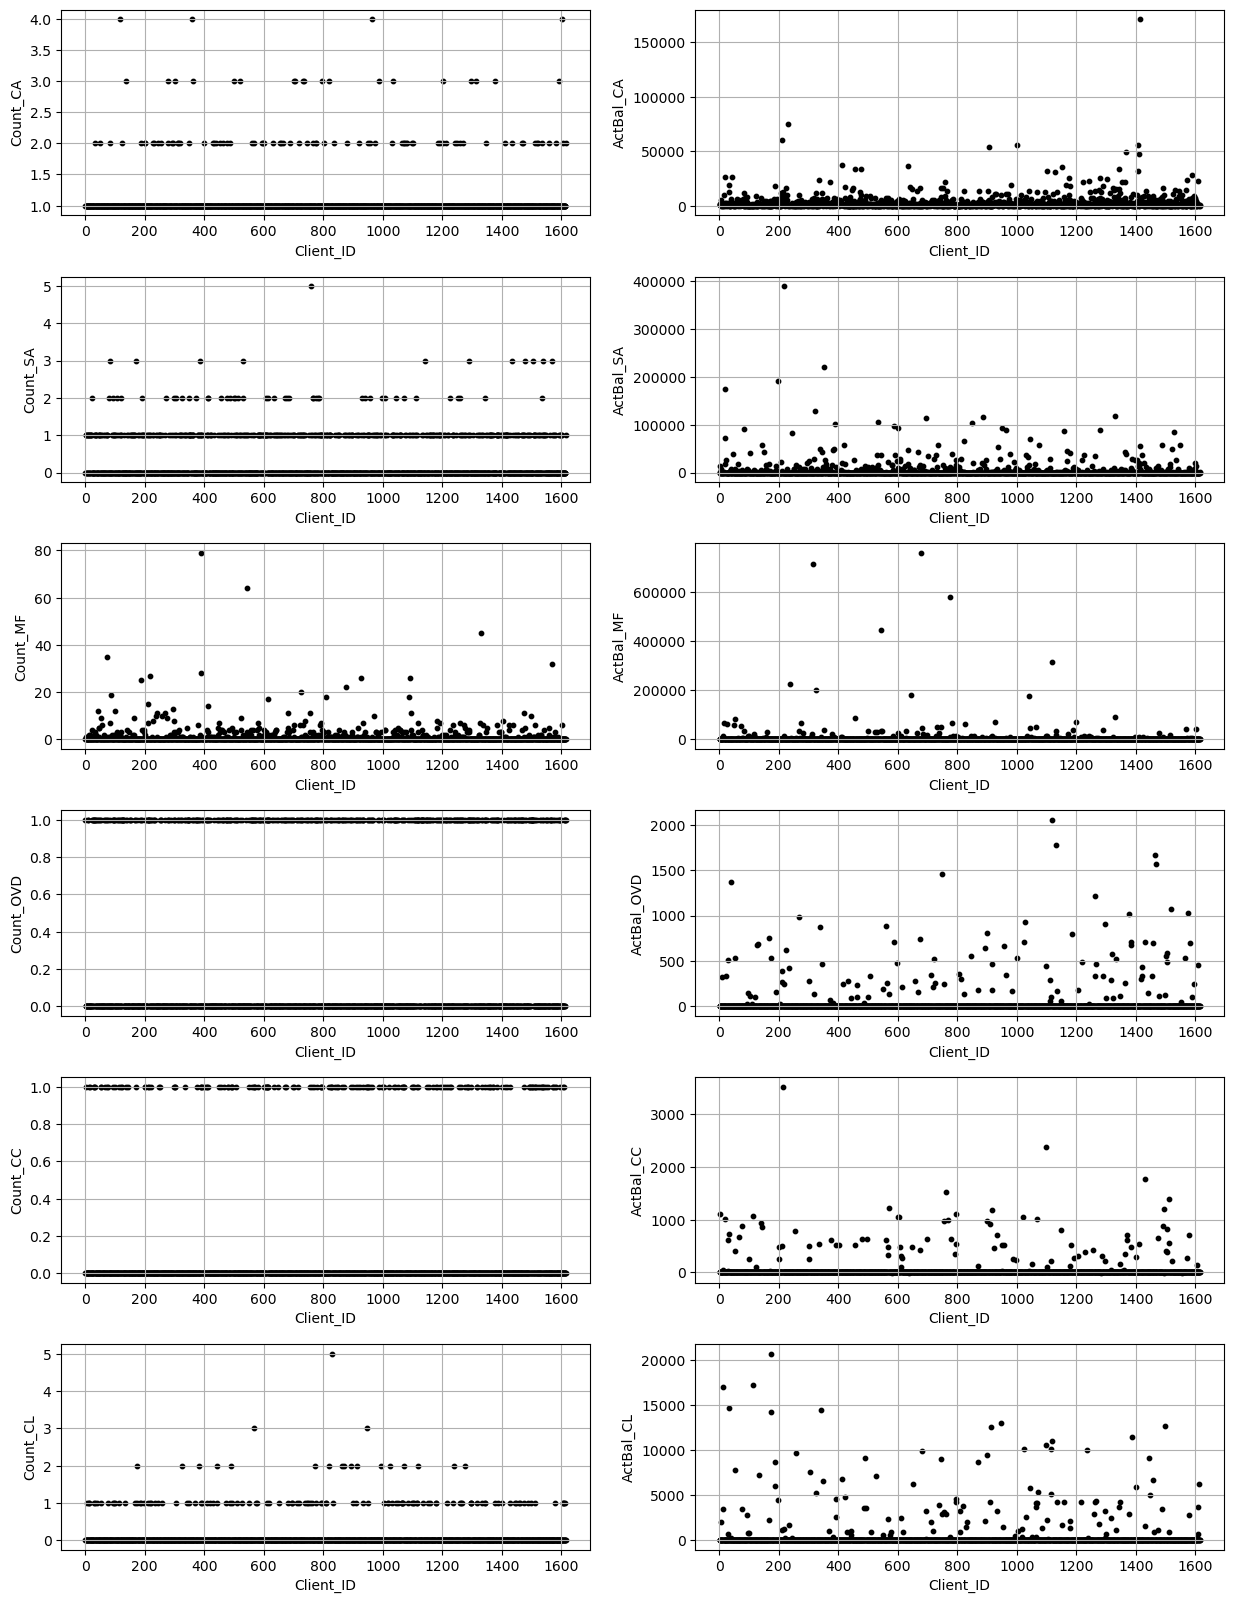

In [18]:
#----- d. Visual Inspection of the Soc_Dem

fig, axs = plt.subplots(6,2, figsize = (15,20))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

columns = list(Products_ActBalance.columns)

#------ Graphing scattered plot of client vs feature values
for i in range(0,6):
    for j in range(0,2):        
        feature = columns[(i+1) + (6*j)]
        axs[i,j].scatter( Products_ActBalance['Client'], Products_ActBalance[feature], color = 'black', s = 10)
        axs[i,j].set(xlabel = 'Client_ID' , ylabel = feature)
        axs[i,j].grid(True)    
        
plt.show()

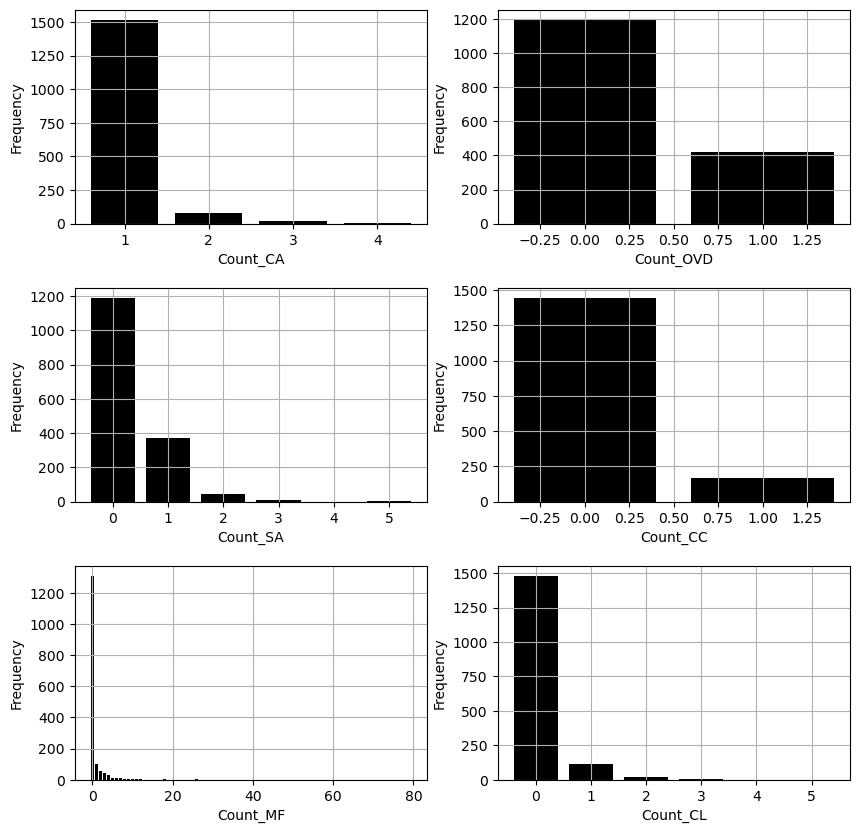

In [19]:
#----- d. Visual Inspection of the Soc_Dem

fig, axs = plt.subplots(3,2, figsize = (10,10))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

#------ Bar graph
for i in range(0,3):
    for j in range(0,2):        
        feature = columns[(i+1) + (3*j)]
        temp = Products_ActBalance[feature].value_counts()
        axs[i,j].bar(temp.index,temp, color = 'black')
        axs[i,j].set(xlabel = feature, ylabel = 'Frequency')
        axs[i,j].grid(True)    

plt.show()

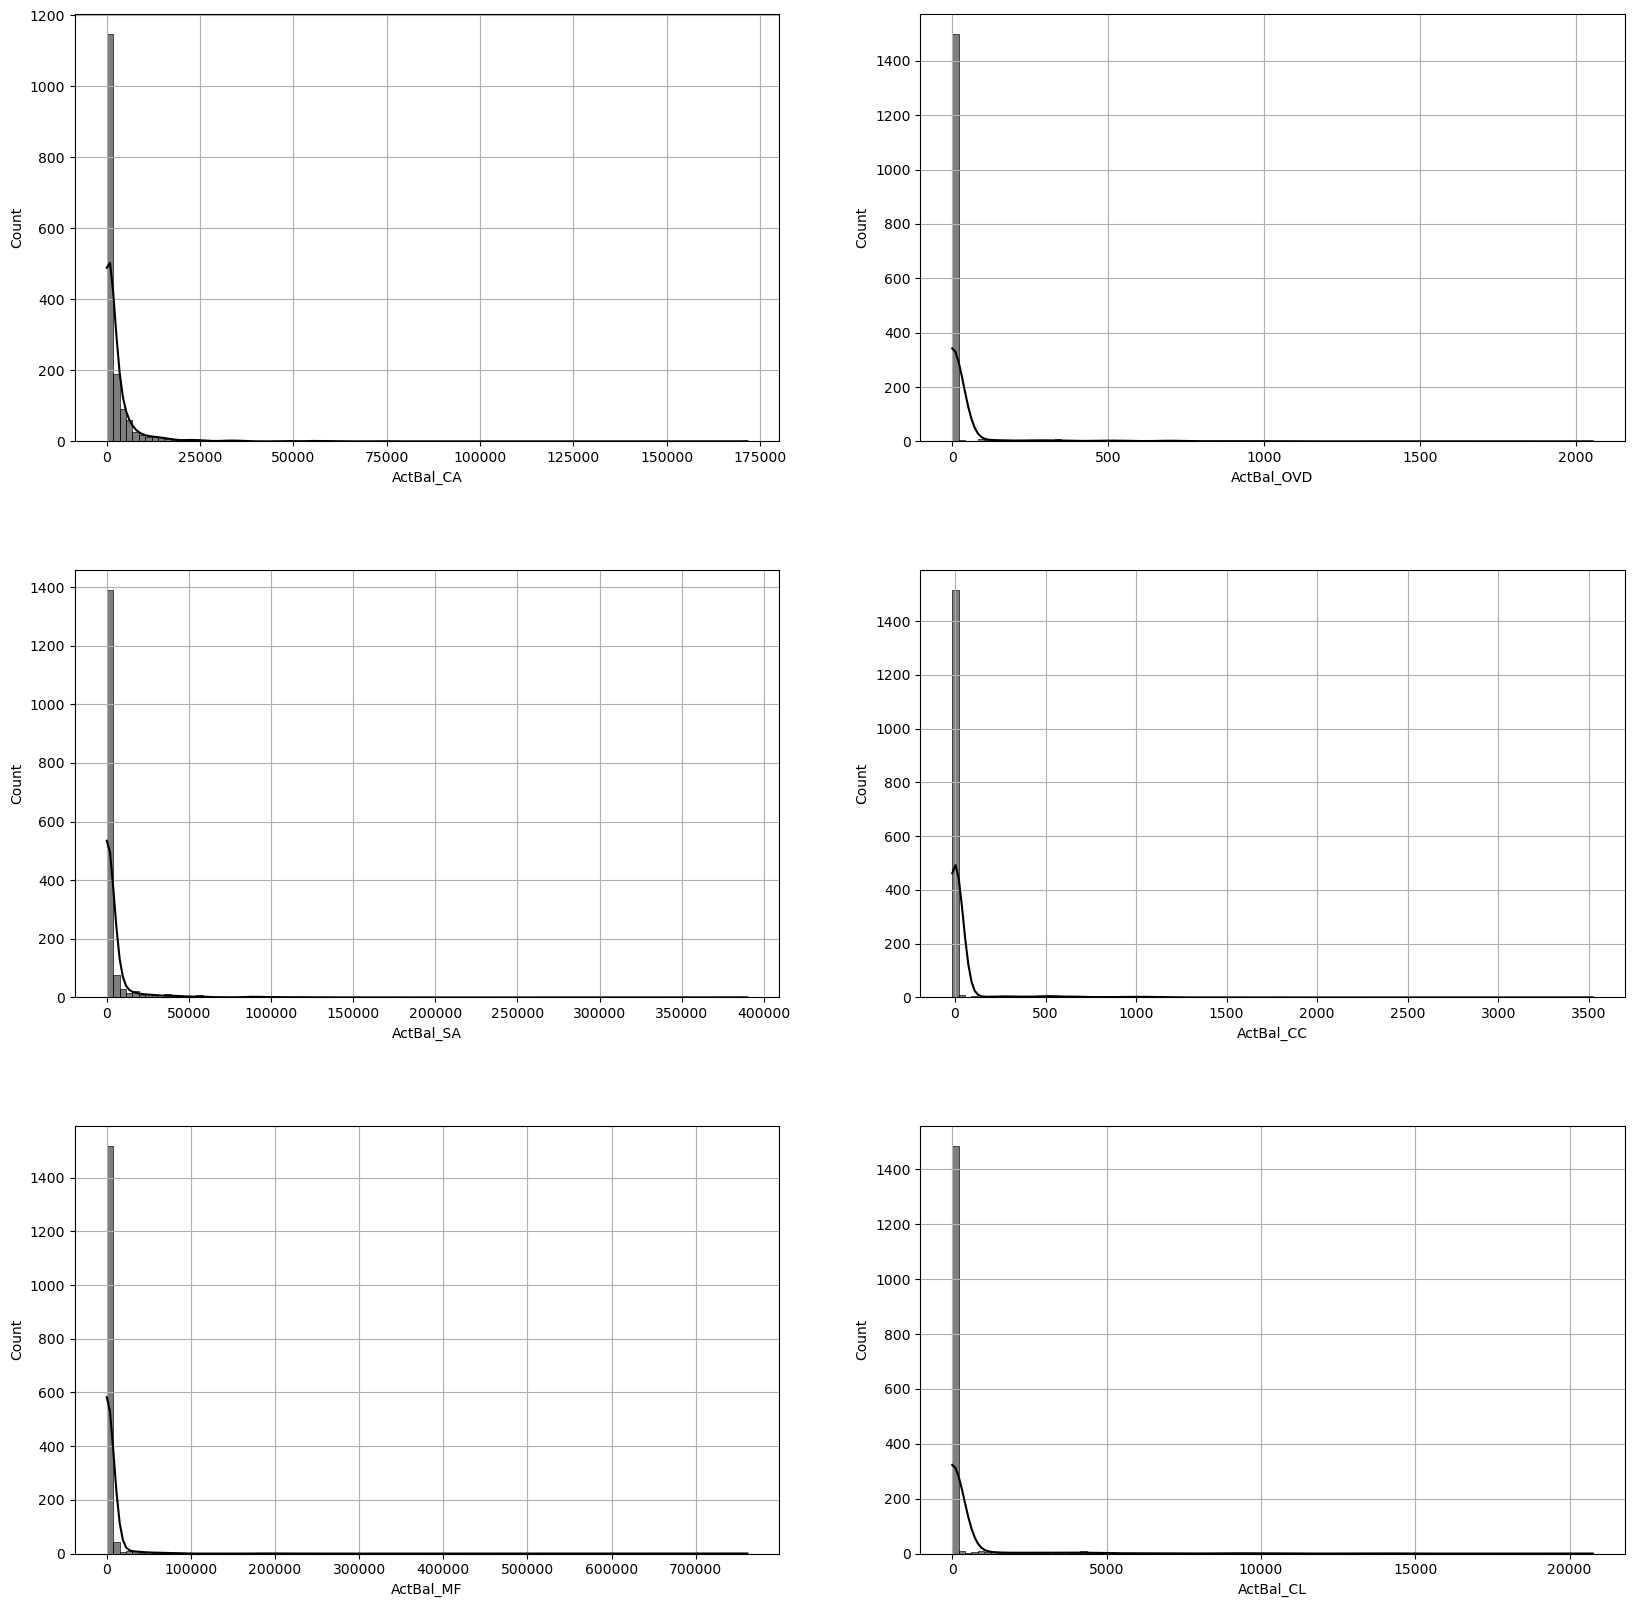

In [20]:
#----- d. Visual Inspection of the Soc_Dem

fig, axs = plt.subplots(3,2, figsize = (20,20))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(0,3):
    for j in range(0,2):        
        feature = columns[(i+1) + (3*j) + 6]
        sb.histplot(Products_ActBalance[feature],bins = 100, kde = True,ax = axs[i,j],color='black')
        axs[i,j].grid(True)
       
plt.show()

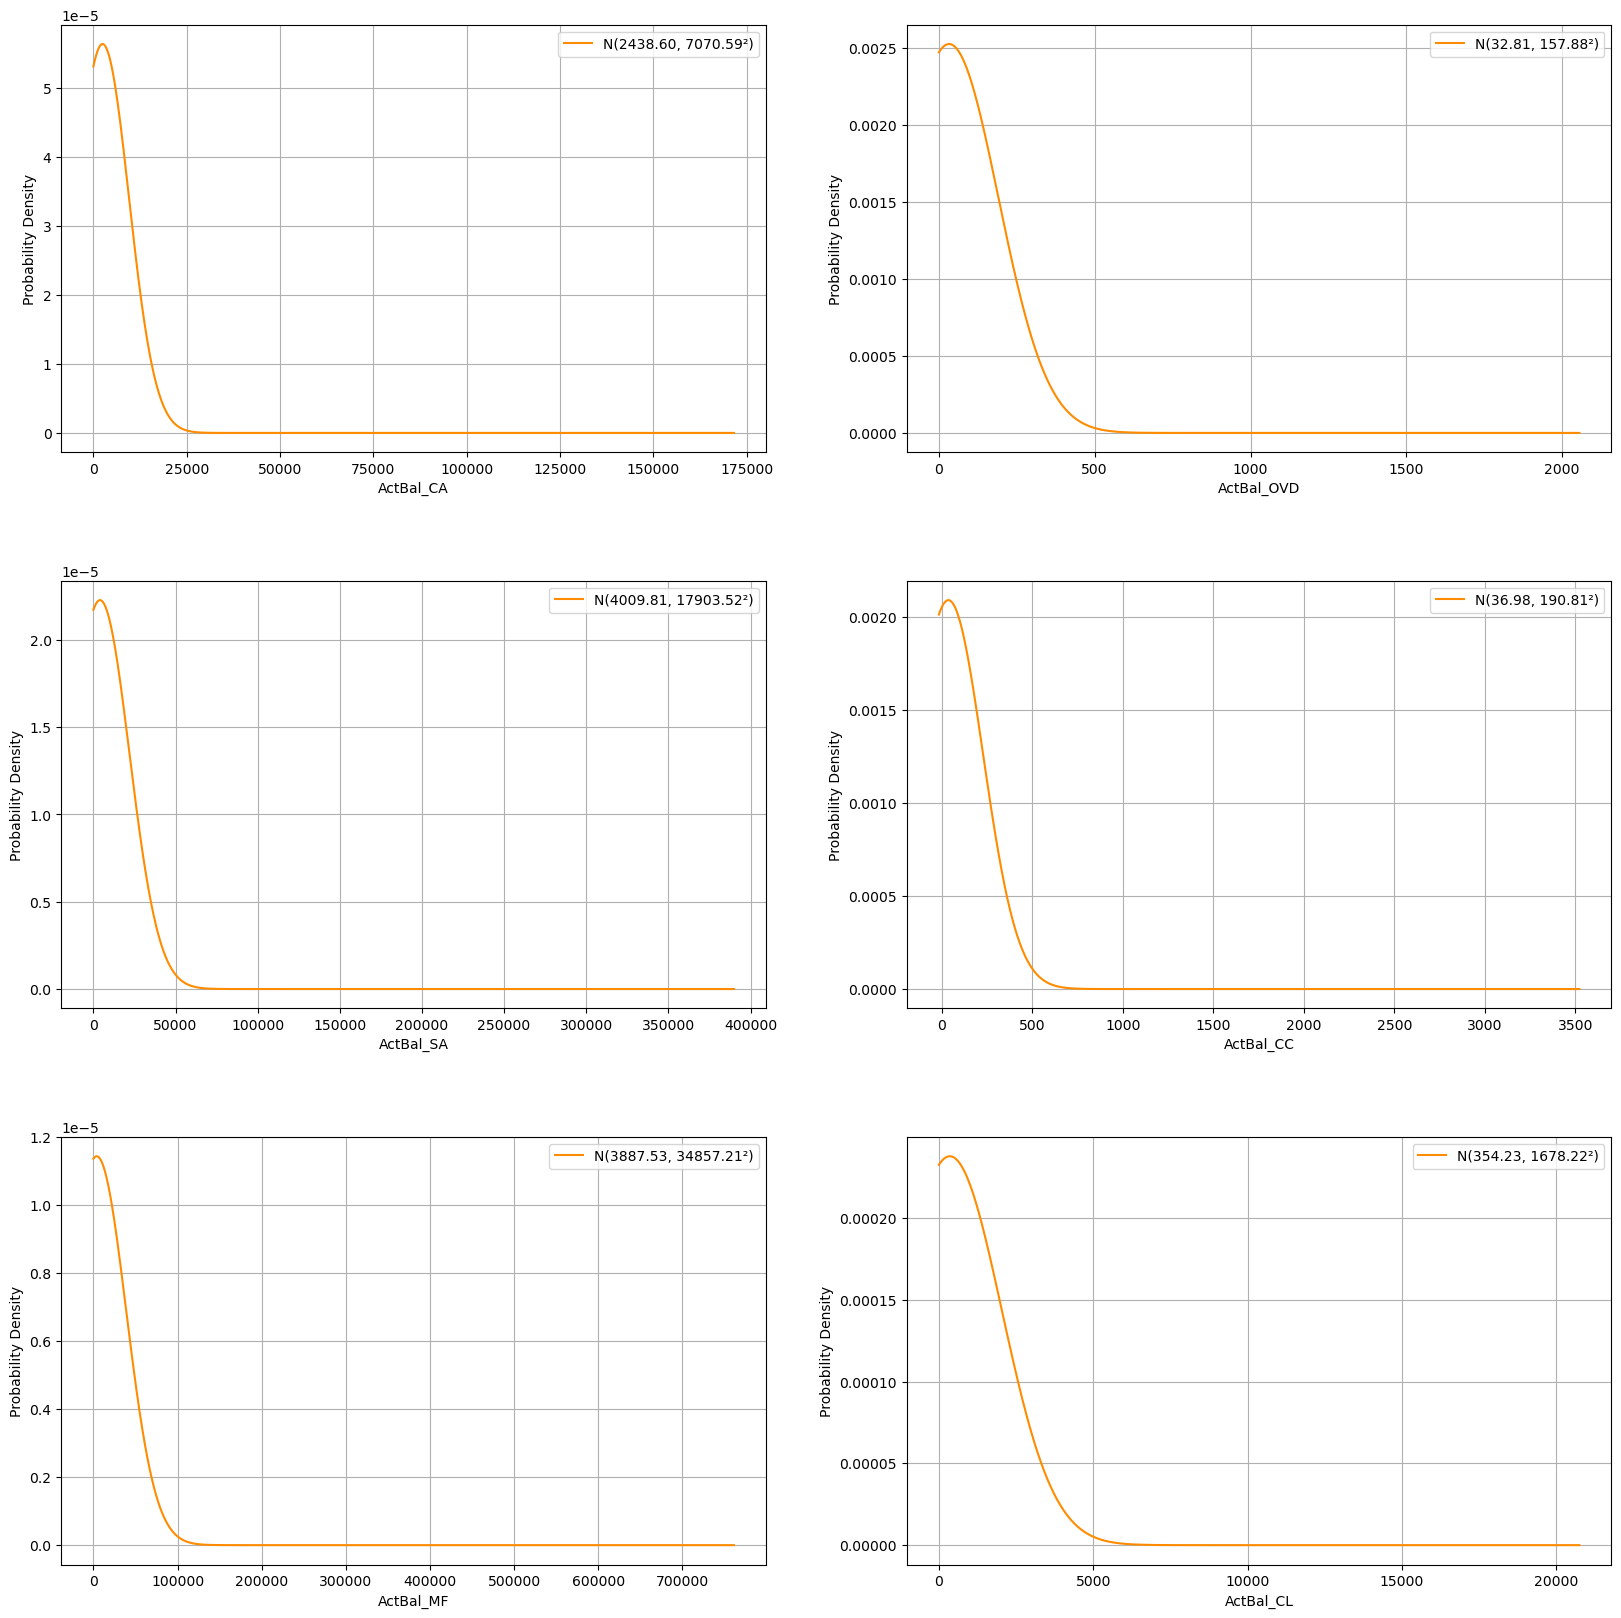

In [21]:
#----- d. Visual Inspection of the Soc_Dem
fig, axs = plt.subplots(3,2, figsize = (20,20))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(0,3):
    for j in range(0,2):        
        feature = columns[(i+1) + (3*j) + 6]
        feature_data = Products_ActBalance[feature]

        mean, std = norm.fit(feature_data)
        x = np.linspace(min(feature_data), max(feature_data), 1000)
        y = norm.pdf(x, mean,std)
        
        axs[i,j].plot(x, y, color='darkorange',label = f'N({mean:.2f}, {std:.2f}²)')
        axs[i,j].set(xlabel = feature, ylabel = 'Probability Density')
        axs[i,j].legend()
        axs[i,j].grid(True)
        
plt.show()

In [24]:
#----- e. Descriptive Statistics
preprocess.descriptive_stats(Products_ActBalance, 'Products_ActBalance', columns[7:13])


#----- Descriptive Stats of feature: ActBal_CA of data-group:Products_ActBalance
Mean:2438.601940513047 Std:7072.777349644307
Min_value :0.0 Max_value:171575.88964285716

#----- Descriptive Stats of feature: ActBal_SA of data-group:Products_ActBalance
Mean:4009.8127808491818 Std:17909.061545143348
Min_value :0.0 Max_value:389883.8307142857

#----- Descriptive Stats of feature: ActBal_MF of data-group:Products_ActBalance
Mean:3887.5326592215833 Std:34868.010168988396
Min_value :0.0 Max_value:761235.5042857144

#----- Descriptive Stats of feature: ActBal_OVD of data-group:Products_ActBalance
Mean:32.80650574966829 Std:157.926428781743
Min_value :0.0 Max_value:2055.3253571428572

#----- Descriptive Stats of feature: ActBal_CC of data-group:Products_ActBalance
Mean:36.97846528084918 Std:190.8695924409708
Min_value :-15.479285714285714 Max_value:3522.2335714285714

#----- Descriptive Stats of feature: ActBal_CL of data-group:Products_ActBalance
Mean:354.23013467492257 Std:1678.743095405821